# Summary

1. Load data and browse data
2. Explore data   
  2.1 Select identifier   
  
  2.2 Numeric variables    
  2.2.1 page_stayTime  
  
  2.3 Categorical variables    
  2.3.1 event  
  2.3.2 day  
  2.3.3 title  
  2.3.4 latest_referrer_host  
  2.3.5 latest_utm_source  
  2.3.6 browser  
  2.3.7 ip  
  2.3.8 model  
  2.3.9 os  
  2.3.10 name  
  2.3.11 is_first_day  

3. Select features  

## 1. Load data and browse data

In [436]:
# Import modules
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to
%matplotlib inline

# Always make it pretty.
plt.style.use('ggplot')

In [437]:
# set maximum shown rows as 15
pd.options.display.max_rows = 15

In [438]:
# Load data from file
df = pd.read_csv('../data/data_all.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [439]:
# Browse dataset
df.head(5)

,tp,nocache,dist_id,event,day,page_stayTime,title,latest_referrer,latest_referrer_host,latest_utm_campaign,...,ip,model,os,os_version,is_first_day,is_first_time,name,isSuccess,isMsg,result
0,track,654392402996,595466e9a8e733434ce08de16e927d985e0b5d48,index_leave,2017-03-06,5.692,NaN,NaN,NaN,通用词,...,219.135.131.99,pc,windows,6.1,True,False,NaN,NaN,NaN,NaN
1,track,9587552771961,9939d3e087bca29c42334d96dccd25ca0e06652a,$pageview,2017-03-06,NaN,神策数据 | Sensors Data - 国内领先的用户行为分析产品,NaN,NaN,NaN,...,111.204.198.242,pc,windows,10.0,True,True,NaN,NaN,NaN,NaN
2,track,652937076129,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,2017-03-06,NaN,NaN,NaN,NaN,NaN,...,111.204.198.242,pc,windows,10.0,True,False,request,NaN,NaN,NaN
3,track,8207407748558,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,2017-03-06,NaN,NaN,NaN,NaN,NaN,...,111.204.198.242,pc,windows,10.0,True,False,request,NaN,NaN,NaN
4,track,4967393021929,595466e9a8e733434ce08de16e927d985e0b5d48,demo_leave,2017-03-06,21.291,NaN,https://www.baidu.com/baidu.php,www.baidu.com,通用词,...,219.135.131.99,pc,windows,6.1,True,False,NaN,NaN,NaN,NaN


In [440]:
df['tp'].value_counts()

track    65673
Name: tp, dtype: int64

Here we focus only on the 65,673 'track' record.

In [441]:
# Inspect dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65673 entries, 0 to 65672
Data columns (total 26 columns):
tp                      65673 non-null object
nocache                 65673 non-null int64
dist_id                 65673 non-null object
event                   65673 non-null object
day                     65673 non-null object
page_stayTime           16720 non-null float64
title                   32620 non-null object
latest_referrer         40374 non-null object
latest_referrer_host    40374 non-null object
latest_utm_campaign     39903 non-null object
latest_utm_content      38763 non-null object
latest_utm_medium       39691 non-null object
latest_utm_source       40583 non-null object
latest_utm_term         39095 non-null object
browser                 65673 non-null object
browser_version         65673 non-null float64
ip                      65673 non-null object
model                   65673 non-null object
os                      65673 non-null object
os_version      

In [442]:
# Show summary stats
df.describe()

,nocache,page_stayTime,browser_version,os_version
count,6.567300e+04,1.672000e+04,65673.000000,65673.000000
mean,5.006425e+12,6.681742e+03,38.448048,8.148547
std,2.889785e+12,5.343221e+04,20.759074,2.154611
min,8.076069e+07,3.300000e-02,-1.000000,-1.000000
25%,2.502955e+12,5.390750e+00,10.000000,6.100000
50%,5.009308e+12,2.057950e+01,50.000000,10.000000
75%,7.504237e+12,2.261860e+02,56.000000,10.110000
max,9.999519e+12,2.918014e+06,59.000000,10.900000


In [443]:
# Count missing values by column
df.isnull().sum().sort_values(ascending=False)

isMsg                 65204
isSuccess             64882
result                64510
name                  50552
page_stayTime         48953
title                 33053
latest_utm_content    26910
                      ...  
is_first_day              0
is_first_time             0
day                       0
event                     0
dist_id                   0
nocache                   0
tp                        0
Length: 26, dtype: int64

There are some features with large amount of missing value, we will deal with them later.

## 2. Explore data

### 2.1 Select identifier

In [444]:
df['dist_id'].describe()

count                                        65673
unique                                       11708
top       835cc4405ee7e42e5b401a25e65b4830b02af7d3
freq                                           254
Name: dist_id, dtype: object

In [445]:
print(df['nocache'].value_counts())

7104818490333    7
4158870456740    5
6478417382678    2
4481974656227    2
7255641519909    2
5839058838593    2
9376702152658    1
                ..
4344534689574    1
3663056789361    1
3250978312099    1
8120808271207    1
2588751337464    1
2362459986835    1
8072086379435    1
Name: nocache, Length: 65659, dtype: int64


In [446]:
df['ip'].describe()

count               65673
unique               9870
top       113.208.116.250
freq                 1399
Name: ip, dtype: object

- distinct_id, hash: change from browser and cookie id to protect user privacy; 11708 distinct values
- nocache: might be simplified identifier. The number of distinct nocache is 65659. The frequency is too low.
- ip: 9870 distinct values, each ip address can have multiple users
##### distinct_id is a better identifier，it is random，and can be used for unbiased experiments test split 

### 2.2 Numeric variables

### 2.2.1 page_stayTime

In [447]:
# transform 'page_stayTime' from milliseconds to seconds
df['page_stayTime'] = round(df['page_stayTime'] / 1000, 3) 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


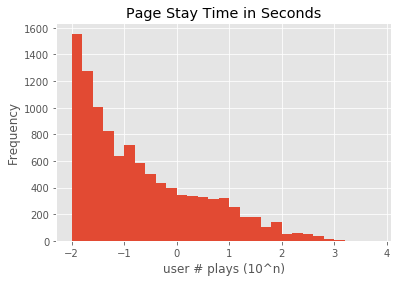

In [448]:
# log transfer to avoid long tail
np.log10(df['page_stayTime']).plot.hist(bins=np.arange(-2,4,0.2), range=(df['page_stayTime'].min(),df['page_stayTime'].max()))
plt.xlabel("user # plays (10^n)")
plt.title('Page Stay Time in Seconds') 
plt.savefig('page_stayTime.png',bbox_inches="tight",dpi=500)    

In [449]:
df['page_stayTime'].describe()

count    16720.000000
mean         6.681739
std         53.432215
min          0.000000
25%          0.005000
50%          0.021000
75%          0.226000
max       2918.014000
Name: page_stayTime, dtype: float64

##### Insights 

The plot shows that most of user stayed in the page for less than 1 second(10^-1), and the 75 percentile 'page_stayTime' value is 0.226 second, which means most of the records with 'page_stayTime' value did not mean user really stay in the page, they might leave when the page was loading.

In [450]:
stay_rate = round(df['page_stayTime'][df['page_stayTime'] >= 3].count() / \
                  df['page_stayTime'][df['page_stayTime'] >= 0].count(), 4) * 100
print("Only %.2f"% stay_rate,"%","of the people who clicked the functional pages stayed more than 3 seconds")

Only 11.41 % of the people who clicked the functional pages stayed more than 3 seconds


#### create feautres "page_stayTime"
Sum up the total stay time by pages.

In [451]:
# define function to generate features "page_stayTime"
page_leave_list = ['index_leave', 'demo_leave', 'about_leave', 'courses_leave', 'courses_play_leave']

def create_page_stayTime_features(df, leave_list):
    for leave in leave_list:
        df[leave + '_stayTime'] = df[df_time['event'] == leave]['page_stayTime']
        df[leave + '_stayTime'] = df[leave + '_stayTime'].fillna(0)
    return df    

In [452]:
df = create_page_stayTime_features(df, page_leave_list)

In [453]:
df.head(5)

,tp,nocache,dist_id,event,day,page_stayTime,title,latest_referrer,latest_referrer_host,latest_utm_campaign,...,is_first_time,name,isSuccess,isMsg,result,index_leave_stayTime,demo_leave_stayTime,about_leave_stayTime,courses_leave_stayTime,courses_play_leave_stayTime
0,track,654392402996,595466e9a8e733434ce08de16e927d985e0b5d48,index_leave,2017-03-06,0.006,NaN,NaN,NaN,通用词,...,False,NaN,NaN,NaN,NaN,0.006,0.000,0.0,0.0,0.0
1,track,9587552771961,9939d3e087bca29c42334d96dccd25ca0e06652a,$pageview,2017-03-06,NaN,神策数据 | Sensors Data - 国内领先的用户行为分析产品,NaN,NaN,NaN,...,True,NaN,NaN,NaN,NaN,0.000,0.000,0.0,0.0,0.0
2,track,652937076129,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,2017-03-06,NaN,NaN,NaN,NaN,NaN,...,False,request,NaN,NaN,NaN,0.000,0.000,0.0,0.0,0.0
3,track,8207407748558,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,2017-03-06,NaN,NaN,NaN,NaN,NaN,...,False,request,NaN,NaN,NaN,0.000,0.000,0.0,0.0,0.0
4,track,4967393021929,595466e9a8e733434ce08de16e927d985e0b5d48,demo_leave,2017-03-06,0.021,NaN,https://www.baidu.com/baidu.php,www.baidu.com,通用词,...,False,NaN,NaN,NaN,NaN,0.000,0.021,0.0,0.0,0.0


### 2.3 Categorical variables

### 2.3.1 event

In [454]:
df['event'].value_counts()

$pageview                32620
btnClick                 13866
index_leave              10394
demo_leave                3411
about_leave               1032
courses_leave              906
formSubmit                 791
courses_play_leave         747
click_send_cellphone       600
verify_cellphone_code      563
clickSubmit                513
page_close                 230
Name: event, dtype: int64

##### Funnel Analysis:  
page view -> btnClick -> click_send_cellphone -> verify_cellphone_code -> clickSubmit -> formSubmit

#### Calculate conversation between funnel sections

In [455]:
feature_percentage_list = ['page_close','clickSubmit','verify_cellphone_code','click_send_cellphone', 'courses_play_leave', 
           'about_leave', 'demo_leave', 'index_leave', 'btnClick','$pageview']

In [456]:
# define function to calculate distinct 'dist_id' of different events in 'feature_percentage_list'
def count_distinct(df, feature_percentage_list):
    count = []
    for feature in feature_percentage_list:
        count.append(df[df['event'] == feature]['dist_id'].nunique())
    return count

In [457]:
# count distinct 'dist_id' of different events in 'feature_percentage_list'
distinct = count_distinct(df, feature_percentage_list)
# count distinct 'dist_id' clicking the 'request' button, and add to the distinct list
distinct = distinct + [df[df['name']== 'request']['dist_id'].nunique()]
# count distinct 'dist_id' successfully sign up, and add to the distinct list
# we define successfully sign up as property 'isSuccess' is 'True'
distinct = distinct + [df[df['isSuccess']== True]['dist_id'].nunique()]

In [460]:
# add 'apply_for_trial' and 'sign_up_successfully' to 'feature_percentage_list'
feature_percentage_list = feature_percentage_list + ['apply_for_trial', 'sign_up_successfully']

In [461]:
# count distinct 'dist_id' in event '$pageview'
pageview_distinct = df[df['event'] == '$pageview']['dist_id'].nunique()
# create dataframe
df_distinct = pd.DataFrame(
    {'event': feature_percentage_list,
     'distinct_dist_id_count': distinct,
     '$pageview_dist_id_count':[pageview_distinct] * len(feature_percentage_list)
    })

In [462]:
# create new column to calculate 'Conversation Rate'
df_distinct['Conversation Rate'] = round(df_distinct['distinct_dist_id_count'] / \
                                         df_distinct['$pageview_dist_id_count'] ,4)

In [463]:
# set_index and reorder index
df_distinct = df_distinct.set_index('event')
df_distinct = df_distinct.reindex(['page_close','sign_up_successfully',
                                   'clickSubmit', 'verify_cellphone_code',
                                   'click_send_cellphone', 'apply_for_trial',
                                   'courses_play_leave', 'about_leave', 
                                   'demo_leave', 'index_leave', 
                                   'btnClick','$pageview'])
df_distinct

,distinct_dist_id_count,$pageview_dist_id_count,Conversation Rate
event,,,
page_close,97,11587,0.0084
sign_up_successfully,457,11587,0.0394
clickSubmit,461,11587,0.0398
verify_cellphone_code,472,11587,0.0407
click_send_cellphone,501,11587,0.0432
apply_for_trial,2106,11587,0.1818
courses_play_leave,370,11587,0.0319
about_leave,712,11587,0.0614
demo_leave,1436,11587,0.1239


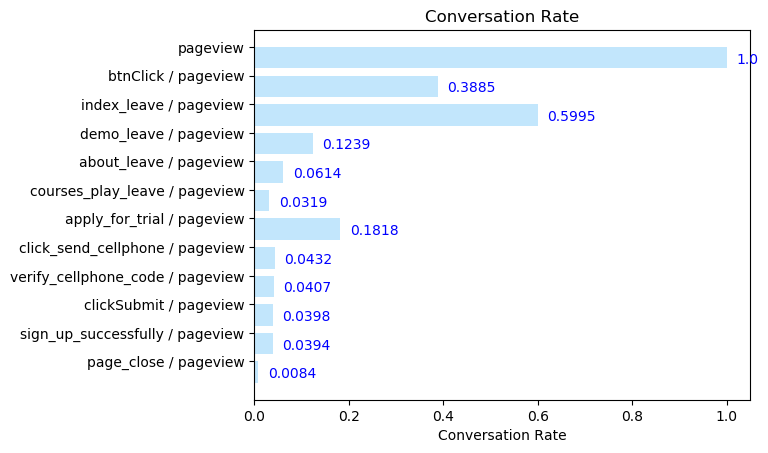

In [464]:
import matplotlib.pyplot as plt; plt.rcdefaults()

x = ('page_close / pageview','sign_up_successfully / pageview',
     'clickSubmit / pageview','verify_cellphone_code / pageview',
     'click_send_cellphone / pageview','apply_for_trial / pageview',
     'courses_play_leave / pageview', 'about_leave / pageview', 
     'demo_leave / pageview', 'index_leave / pageview', 
     'btnClick / pageview','pageview')
y = df_distinct['Conversation Rate']
 
fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="lightskyblue", align='center', alpha=0.5)
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.xlabel('Conversation Rate')
plt.title('Conversation Rate') 

for i, v in enumerate(y):
    ax.text(v + 0.02, i - 0.2, str(v), color='blue')
plt.savefig('conversationrate.png',bbox_inches="tight",dpi=500)    
plt.show()

Here we define 'signup' with the action 'click_send_cellphone', which means 'dist_id' attemps to sign up an account.  
We define 'signup successfully' with 'isSuccess' property of 'formSubmit'  is 'True'.  
We define 'apply_for_trial' with 'name' property of 'btnClick' is 'request'.

In [466]:
# claculate the conversion rate between different funnel sections
# ratio of 'btnClick' distinct 'dist_id' to '$pageview' distinct 'dist_id'
button_click_rate = round(df[df['event'] == 'btnClick']['dist_id'].nunique()/
                         df[df['event'] == '$pageview']['dist_id'].nunique(), 4) * 100
# ratio of 'btnClick_request' distinct 'dist_id' to '$pageview' distinct 'dist_id'
apply_for_trial_rate = round(df[df['name']== 'request']['dist_id'].nunique()/
                         df[df['event'] == '$pageview']['dist_id'].nunique(), 4) * 100
# ratio of 'click_send_cellphone' distinct 'dist_id' to 'btnClick_request' distinct 'dist_id'
signup_to_apply_for_trial_rate = round(df[df['event'] == 'click_send_cellphone']['dist_id'].nunique()/
                         df[df['name']== 'request']['dist_id'].nunique(), 4) * 100
# ratio of 'click_send_cellphone' distinct 'dist_id' to '$pageview' distinct' distinct 'dist_id'
signup_rate = round(df[df['event'] == 'click_send_cellphone']['dist_id'].nunique()/
                         df[df['event'] == '$pageview']['dist_id'].nunique(), 4) * 100
# ratio of 'signup successfully' distinct 'dist_id' to 'click_send_cellphone' distinct 'dist_id'
successfully_signup_rate = round(df[df['isSuccess'] == True]['dist_id'].nunique()/
                         df[df['event'] == 'click_send_cellphone']['dist_id'].nunique(), 4) * 100
print("'button_click_rate':", "%.2f"% button_click_rate,"%","of the people who viewed the webpage and clicked a button")
print("'apply_for_trial_rate':", "%.2f"% apply_for_trial_rate,"%","of the people who viewed the webpage and clicked the 'request' button")
print("'signup_to_apply_for_trial_rate':", "%.2f"% signup_to_apply_for_trial_rate,"%","of the people who clicked the 'request' button and clicked 'send_cellphone' attempting to signup")
print("'signup_rate':", "%.2f"% signup_rate,"%","of the people who viewed the webpage and clicked 'send_cellphone' attempting to signup")
print("'successfully_signup_rate':","%.2f"% successfully_signup_rate,"%","of the people who clicked 'send_cellphone' attempting to signup did successfully registered")

'button_click_rate': 38.85 % of the people who viewed the webpage and clicked a button
'apply_for_trial_rate': 18.18 % of the people who viewed the webpage and clicked the 'request' button
'signup_to_apply_for_trial_rate': 23.79 % of the people who clicked the 'request' button and clicked 'send_cellphone' attempting to signup
'signup_rate': 4.32 % of the people who viewed the webpage and clicked 'send_cellphone' attempting to signup
'successfully_signup_rate': 91.22 % of the people who clicked 'send_cellphone' attempting to signup did successfully registered


##### Insights：
From the plot and ratio calculated above, we notice that:  
- 'button_click_rate' is only 38.85%, most users do not click buttons on pages.  
We should improve the layout of our pages, modify the wording or color of our buttons to make our pages more attractive.
- 'apply_for_trial_rate' is only 18.18%, most users do not click 'request' buttons on pages.  
We should polish our service description, modify the wording or color of our 'request' buttons to make our pages more attractive.
- 'signup_to_apply_for_trial_rate' is only 23.79%, most users who clicked 'request' button at the beginning did not apply when they were asked to provide phone number, perhaps the users care about personal privacy.  
Providing other registration options, like e-mail or social network accounts, may be a good choice.
- 'signup_rate' is only 4.32%, most users who viewed the webpage did not attempt to sign up, the same idea with 'apply_for_trial_rate'.  
- 'successfully_signup_rate' is 91.22%, we lost nearly 9% of users who attempting to sign up.  
We should try to improve the efficiency of our sign up process, provide other registration options.

### 2.3.2 day

Text(0.5,1,'Log Record Counts by Day')

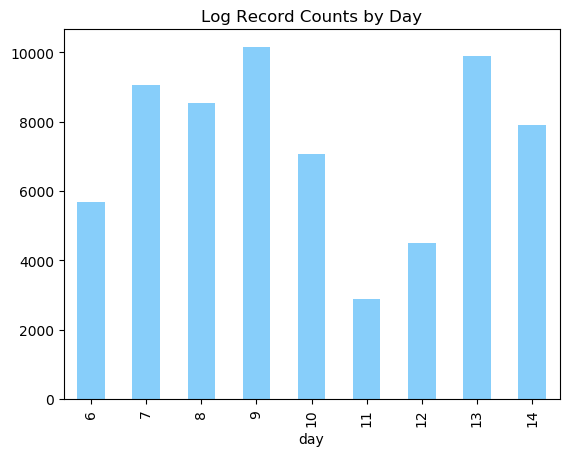

In [467]:
import matplotlib.pyplot as plt; plt.rcdefaults()
# plot records count by day
df["day"] = df["day"].astype("datetime64")
df["day"].groupby(df["day"].dt.day).count().plot(kind="bar", color="lightskyblue")
plt.title('Log Record Counts by Day') 

We notice that there are less user behaviors in 2017-03-11 and 2017-03-12, let's check the day of week of these two days. 

In [428]:
# check day of week
print("2017-03-11 is the", datetime.datetime(2017, 3, 11).weekday() + 1 , "th day of the week")

2017-03-11 is the 6 th day of the week


In [427]:
# check day of week
print("2017-03-12 is the", datetime.datetime(2017, 3, 12).weekday() + 1 , "th day of the week")

2017-03-12 is the 7 th day of the week


##### Insights：
2017-03-11 and 2017-03-12 are weekends and have the least number of counts, perhaps users visit our website more for work purposes.

#### create feature 'weekend' 
With values: '1' for weekend, '0' and weekdays

In [355]:
df['weekend'] = ((df.day == '2017-03-11') | (df.day == '2017-03-12')) * 1

In [399]:
df['weekend'].value_counts(dropna = False)

0    58300
1     7373
Name: weekend, dtype: int64

### 2.3.3 title 

In [359]:
df[df['event'] == '$pageview']["title"].value_counts(dropna=False) 

神策数据 | Sensors Data - 国内领先的用户行为分析产品                   13700
神策分析|Sensors Analytics-帮你实现数据驱动－demo                   4148
介绍 · Sensors Analytics 使用手册                            3542
神策分析|Sensors Analytics-帮你实现数据驱动－产品                     2455
神策分析|Sensors Analytics-帮你实现数据驱动－B轮融资发布会                1899
神策分析|Sensors Analytics-帮你实现数据驱动－关于                     1183
神策分析|Sensors Analytics-帮你实现数据驱动-视频列表                   1129
                                                      ...  
C SDK · Sensors Analytics 使用手册                            1
3 神策分析|Sensors Analytics-帮你实现数据驱动－demo                    1
Sensor Analytics - help you implement data drivers        1
3 神策分析|Sensors Analytics-帮你实现数据驱动－关于                      1
神策分析 | Sensors Analytics - 帮你实现数据驱动－B 轮融资发布会              1
其他辅助工具 · Sensors Analytics 使用手册                           1
导入状态 · Sensors Analytics 使用手册                             1
Name: title, Length: 108, dtype: int64

##### Insights:
Users visit our ‘demo’ page, ‘user manual’ page and ‘product’ page most frequently. If we plan to improve the layout of our pages, these three pages should have high priority.

### 2.3.4 latest_referrer_host

In [360]:
df[df['event'] == '$pageview']['latest_referrer_host'].value_counts(dropna=False)  

NaN                          13771
www.baidu.com                13146
m.baidu.com                    983
36kr.com                       694
www.sogou.com                  687
www.google.com.hk              416
www.google.com                 346
                             ...  
www.xfz.cn                       1
sensorsdata.chunyu.me            1
lnkd.in                          1
saweb.quickcan.com               1
cache.baiducontent.com           1
vincentt.baijia.baidu.com        1
www.innotree.cn                  1
Name: latest_referrer_host, Length: 197, dtype: int64

##### Insights:  
Most of empty ‘latest_referrer_host’ are directly from sensordata website.
The other users were referred mostly from 'baidu', '36kr', 'sogou' and 'google', especially 'baidu' which contributed times of referred users than the other hosts.
Thus, if we want to run marketing campaign, 'baidu' should be allocated more budget to.

#### create feature 'latest_referrer_host_bin' 
With values: 'sensordata', 'baidu' and 'others'

In [362]:
df['latest_referrer_host_bin'] = df['latest_referrer_host']

In [363]:
# fill empty values as 'sensordata'
df['latest_referrer_host_bin'] = df['latest_referrer_host_bin'].fillna('sensordata')

In [365]:
# assign value "baidu" to df['latest_referrer_host_bin'] whose value contains 'baidu'
df.latest_referrer_host_bin[df.latest_referrer_host_bin.str.contains('baidu')] = 'baidu'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [366]:
# assign value "others" to df['latest_referrer_host_bin'] whose value is not 'baidu' and 'sensordata'
df.latest_referrer_host_bin[~df.latest_referrer_host_bin.isin(['baidu','sensordata'])] = 'others'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [400]:
df.latest_referrer_host_bin.value_counts(dropna = False)

baidu         31378
sensordata    25299
others         8996
Name: latest_referrer_host_bin, dtype: int64

### 2.3.5 latest_utm_source 

In [118]:
df['latest_utm_source'].value_counts(dropna=False)

baidu           36085
NaN             25090
sogou            1943
sales4c           441
wechat            432
google            393
admin             374
                ...  
xiangc              1
fuyu                1
lingchentian        1
xiuxin              1
huangkan            1
zhangji             1
quqianshun          1
Name: latest_utm_source, Length: 54, dtype: int64

##### Insights:    
Most of campaign sources are 'baidu', and empty ‘latest_utm_source’ are directly from sensordata website.  
Thus, if we want to run marketing campaign, 'baidu' should be allocated more budget to.

#### create feature  'latest_utm_source_bin'
With values: 'sensordata', 'baidu' and 'others'

In [368]:
df['latest_utm_source_bin'] = df['latest_utm_source']

In [369]:
# fill empty values as 'sensordata'
df['latest_utm_source_bin'] = df['latest_utm_source_bin'].fillna('sensordata')

In [370]:
# assign value "baidu" to df['latest_utm_source_bin'] whose value contains 'baidu'
df.latest_utm_source_bin[df.latest_utm_source_bin.str.contains('baidu')] = 'baidu'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [371]:
# assign value "others" to df['latest_utm_source_bin'] whose value is not 'baidu' and 'sensordata'
df.latest_utm_source_bin[~df.latest_utm_source_bin.isin(['baidu','sensordata'])] = 'others'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [401]:
df.latest_utm_source_bin.value_counts(dropna = False)

baidu         36085
sensordata    25090
others         4498
Name: latest_utm_source_bin, dtype: int64

### 2.3.6 browser 

In [122]:
df['browser'].value_counts(dropna=False)

chrome      42091
safari       6952
firefox      3775
qq           2973
sogou        2779
ie           2254
edge         1297
            ...  
liebao         82
android        65
360            59
tt             28
coolnovo        4
yandex          4
ali-ap          1
Name: browser, Length: 23, dtype: int64

##### Insights:    
chrome is the most frequently used browser, much more frequently than the others.

#### create feature 'browser_bin'
With values: 'chrome' and 'others'

In [386]:
df['browser_bin'] = df['browser']

In [387]:
df.browser_bin[df.browser_bin != 'chrome'] = 'others'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [402]:
df.browser_bin.value_counts(dropna = False)

chrome    42091
others    23582
Name: browser_bin, dtype: int64

#### 2.3.7 ip

In [468]:
df['ip'].value_counts(dropna=False)

113.208.116.250    1399
113.208.112.126     673
113.208.118.30      392
122.233.41.29       367
106.38.73.242       247
118.194.240.141     244
61.190.32.52        233
                   ... 
140.207.21.106        1
117.136.0.172         1
23.106.143.176        1
222.128.173.242       1
211.94.132.223        1
114.255.40.53         1
223.74.101.143        1
Name: ip, Length: 9870, dtype: int64

The same ip might be used by several users.

In [389]:
import geoip2.database

# read library from local file
reader = geoip2.database.Reader('../data/GeoLite2-City.mmdb')

In [390]:
# Define CN: user has ip address in China, '1' for 'CN', '0' for abroad
# df['CN'] = df['ip'].apply(lambda row: reader.country(row).country.iso_code == 'CN')
city = []
for i in range(len(df['ip'])):
    try:
        city.append (reader.city(df.loc[i,'ip']).city.name) 
    except:
        city.append('others')

In [391]:
df['city'] = city

In [393]:
df['city'].value_counts()

Beijing         16288
Shanghai         5396
Shenzhen         4361
Guangzhou        3667
Hangzhou         2759
Haidian          1947
Chengdu          1750
                ...  
Paris               1
Wafangdian          1
Tainan City         1
Chengjiao           1
Selden              1
Ordos               1
Redwood City        1
Name: city, Length: 248, dtype: int64

##### Insights:    
We notice most of the users come from 'Beijing', 'Shanghai', 'Shenzhen' and 'Guangzhou'.

#### create feature 'city_bin' 
With values 'Beijing', 'Shanghai', 'Shenzhen', 'Guangzhou' and 'others'

In [394]:
df['city_bin'] = df['city']

In [395]:
df.city_bin[~df.city_bin.isin(['Beijing', 'Shanghai', 'Shenzhen', 'Guangzhou'])] = 'others'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [403]:
df['city_bin'].value_counts(dropna = False)

others       35961
Beijing      16288
Shanghai      5396
Shenzhen      4361
Guangzhou     3667
Name: city_bin, dtype: int64

### 2.3.8 model

In [398]:
df['model'].value_counts()

pc         41656
mac        19037
iphone      2059
android      760
huawei       558
na           448
vivo         267
           ...  
lenovo        13
coolpad       12
htc            4
oppo           3
zte            2
nokia          1
lg             1
Name: model, Length: 20, dtype: int64

##### Insights:    
We notice most of the users use 'pc' and 'mac'.

#### create feature 'model_bin' 
With values 'pc', 'mac' and 'others'

In [405]:
df['model_bin'] = df['model']

In [406]:
df.model_bin[~df.model.isin(['pc', 'mac'])] = 'others'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [407]:
df['model_bin'].value_counts(dropna = False)

pc        41656
mac       19037
others     4980
Name: model_bin, dtype: int64

### 2.3.9 os

In [408]:
df['os'].value_counts(dropna = False)

windows    41656
macosx     19037
Android     2324
iOS         2208
linux        411
na            37
Name: os, dtype: int64

##### Insights:    
We notice most of the users use 'windows' and 'macosx'.

#### create feature 'os_bin' 
With values 'windows', 'macosx' and 'others'

In [409]:
df['os_bin'] = df['os']

In [410]:
df.os_bin[~df.os.isin(['windows', 'macosx'])] = 'others'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [411]:
df['os_bin'].value_counts(dropna = False)

windows    41656
macosx     19037
others      4980
Name: os_bin, dtype: int64

In [412]:
df['model_bin'].value_counts(dropna = False)

pc        41656
mac       19037
others     4980
Name: model_bin, dtype: int64

##### As the distribution of feature 'os_bin' is the same as that of feature 'model_bin', we can only use 'model_bin' and drop 'os_bin'.

### 2.3.10 name

In [413]:
df['name'].value_counts()

request            2967
demo               2783
document           2067
product            1942
b-round            1245
about               925
blog                803
                   ... 
果*                    1
3**                   1
K**************       1
b***                  1
蔡*                    1
1*******              1
3*********            1
Name: name, Length: 313, dtype: int64

save

### 2.3.11 is_first_day

In [431]:
df['is_first_day'].value_counts(dropna = False)

True     43231
False    22442
Name: is_first_day, dtype: int64

##### Insights:    
We notice most users had visited our pages more than one day.

## 3 Select features

### select features 

In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65673 entries, 0 to 65672
Data columns (total 39 columns):
tp                             65673 non-null object
nocache                        65673 non-null int64
dist_id                        65673 non-null object
event                          65673 non-null object
day                            65673 non-null datetime64[ns]
page_stayTime                  16720 non-null float64
title                          32620 non-null object
latest_referrer                40374 non-null object
latest_referrer_host           40374 non-null object
latest_utm_campaign            39903 non-null object
latest_utm_content             38763 non-null object
latest_utm_medium              39691 non-null object
latest_utm_source              40583 non-null object
latest_utm_term                39095 non-null object
browser                        65673 non-null object
browser_version                65673 non-null float64
ip                             656

In [423]:
selected_columns = [u'dist_id',u'event', u'day', u'weekend',
                    u'is_first_day',u'is_first_time',u'index_leave_stayTime',
                    u'demo_leave_stayTime',u'about_leave_stayTime',
                    u'courses_leave_stayTime',u'courses_play_leave_stayTime',
                    u'latest_referrer_host_bin',u'latest_utm_source_bin',u'browser_bin',
                    u'city_bin',u'model_bin']

In [424]:
df_select = df[selected_columns]

In [425]:
df_select.isnull().sum().sort_values(ascending = False) 

model_bin                      0
city_bin                       0
browser_bin                    0
latest_utm_source_bin          0
latest_referrer_host_bin       0
courses_play_leave_stayTime    0
courses_leave_stayTime         0
                              ..
index_leave_stayTime           0
is_first_time                  0
is_first_day                   0
weekend                        0
day                            0
event                          0
dist_id                        0
Length: 16, dtype: int64

##### There is no missing value. 

### Save to csv file

In [426]:
data_select = '../data/data_cleaned.csv'
df_select.to_csv(data_select, index=False)